In [1]:
using Revise
using Plots
using GLMakie
using Statistics

pathBase = "/Users/csfloyd/Dropbox/Projects/TCB2Network/repositories/TCB2Network/Julia/src/"
includet(pathBase * "SimMain.jl")
includet(pathBase * "Visualization.jl")
includet(pathBase * "ReactAdvDiff.jl")
includet(pathBase * "Mechanics.jl")
includet(pathBase * "LightControl.jl")
includet(pathBase * "SharedStructs.jl")
using .SharedStructs
includet(pathBase * "MathFunctions.jl")
using .MathFunctions


In [2]:
# set default parameters
parameters = Dict(
# grid params
"domainType" => "cyl",
"Nx" => 250,
"Ny" => 250,
"dx" => 1.0,
"dt" => 1e-4,
"nSteps" => 2.5 * 60000,
"timeStride" => 1,
"startCollecting" => 0,
"seed" => 0,
    
# boundary conditions
"bcU_X" => "neuCyl",
"bcU_Y" => "neu",

"bcRAD_X" => "neuCyl",
"bcRAD_Y" => "neu",

# chemical parameters
"kAct" => 5e1,
"kInact" => 5e0,
"kTrap" => 3e2,
"kRel" => 7e2,
"kIBind" => 1e-1,
"kIUnbind" => 1e0,
"kABind" => 1e-1,
"kAUnbind" => 0,
"beta" => 0.9,
"CSat" => 5,
    
"DT" => 1,
"DD" => 25,
"DC" => 500,
    
"CDI0" => 2.5,
"CDA0" => 0,
"CBI0" => 0.1,
"CBA0" => 0,
"CC0" => 0,
"CD0" => 20,
"CDst0" => 20,
    
# light control
"width" => 5,
"r0" => 75,
"len" => 1,    
"cyc" => 6,
"del" => 0.25,
    
"lambda0" => 3.0,
"mu0" => 3.0,
"gMin" => 0.5

);

println("T is ", parameters["dt"] * parameters["nSteps"])

println("Done.")

T is 15.0
Done.


In [3]:
using Profile
using ProfileView
(cFArray, dFArray) = SimMain.InitializeAndRun(parameters);

Initializing...
Done initializing.
Beginning simulation...
 67.915977 seconds (205.67 M allocations: 74.134 GiB, 16.46% gc time, 6.67% compilation time)
Done with simulation.


In [9]:
# ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

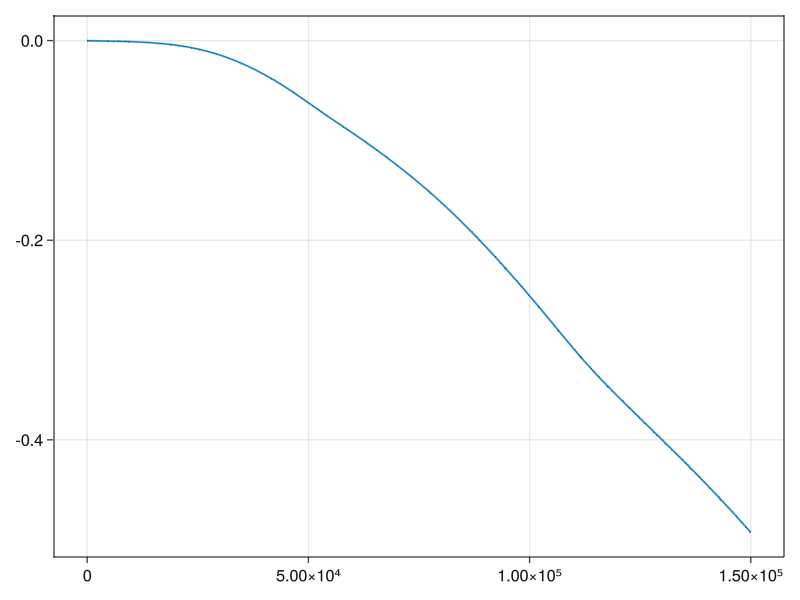

In [4]:
#Makie.lines([cFArray[t].CDASoA.Values[75,1] for t in 1:length(cFArray)])
Makie.lines([dFArray[t].uxSoA.Values[70,1] for t in 1:length(cFArray)])
# Makie.lines([iFun(dt * t * timeStride) for t in 1:length(cFArray)])
#Makie.ylims!(0,2.5)
current_figure()

In [49]:
cFArray[Int(15 / parameters["dt"])].CDISoA.Values[75,1]

0.008488473210276794

In [8]:
dFArray[Int(15 / parameters["dt"])].uxSoA.Values[75,1]

-0.6672285282942461

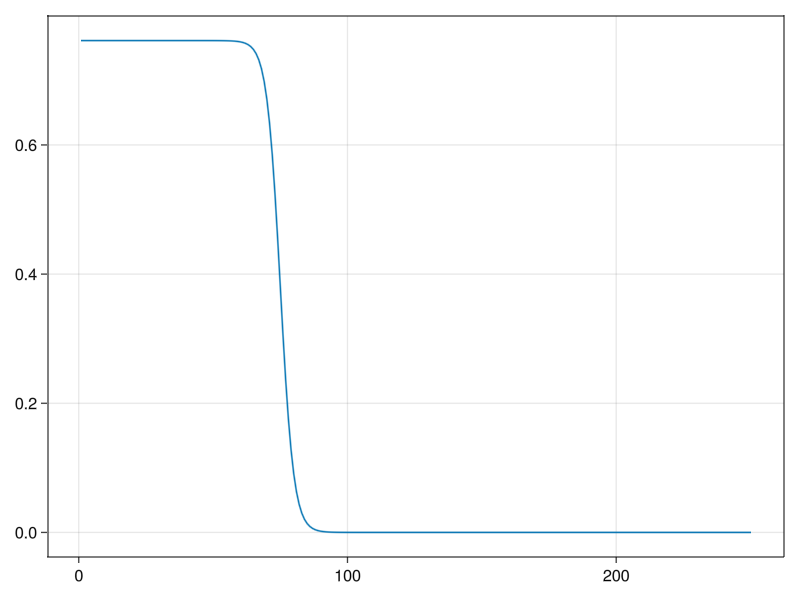

In [65]:
gammaSoA = LightControl.gammaSoAFuncCyl(grid, parameters["r0"], parameters["width"], iFun(dt * 2000))
Makie.lines(gammaSoA.Values[1:end])

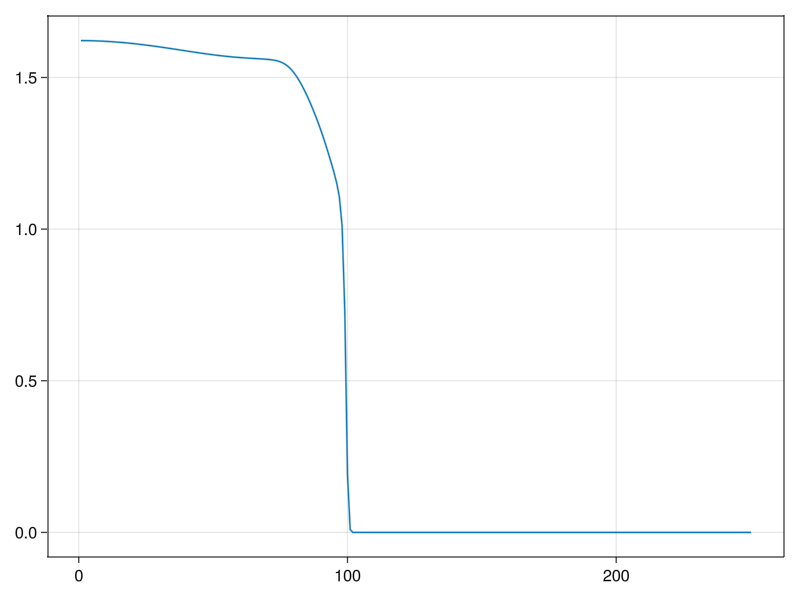

In [84]:
Makie.lines(cFArray[end].CBASoA.Values[1:end])

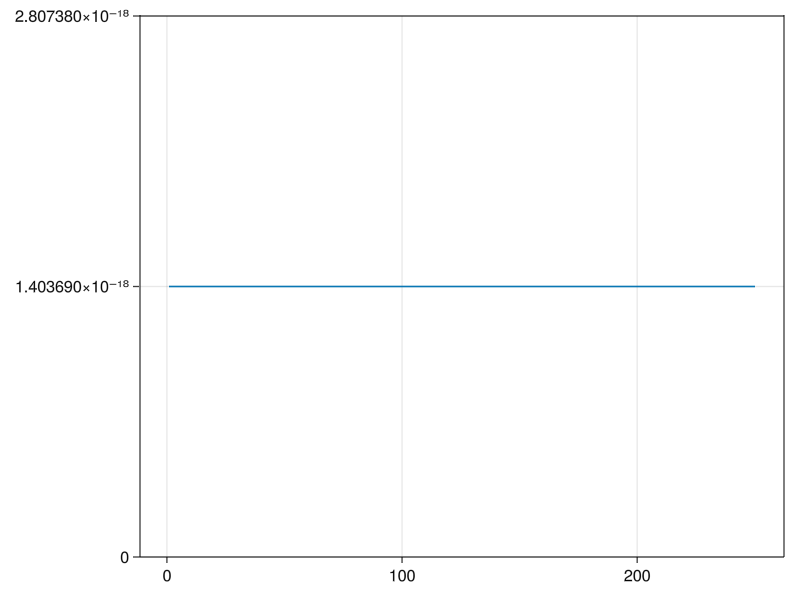

In [19]:
Makie.lines(cFArray[end].CBASoA.Values[1:end])

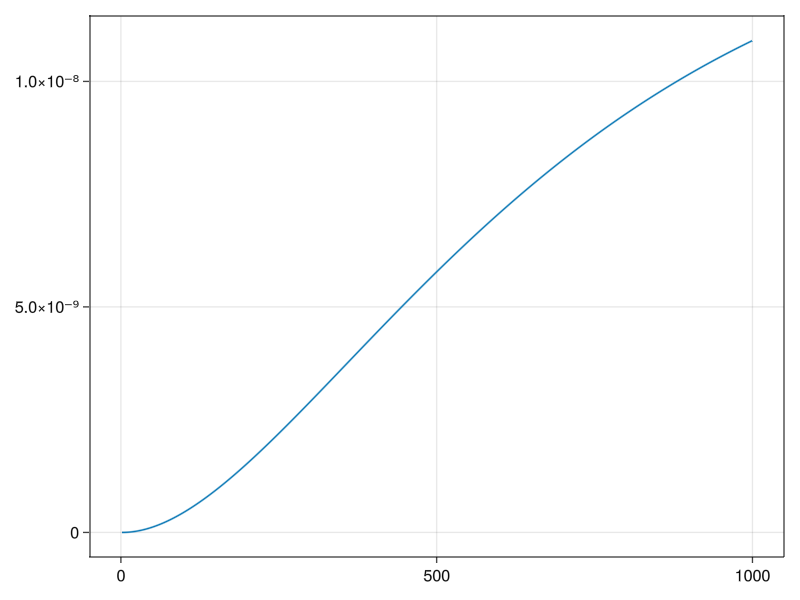

In [47]:
Makie.lines([dFArray[t].uySoA.Values[40, 50] for t in 1:length(cFArray)])

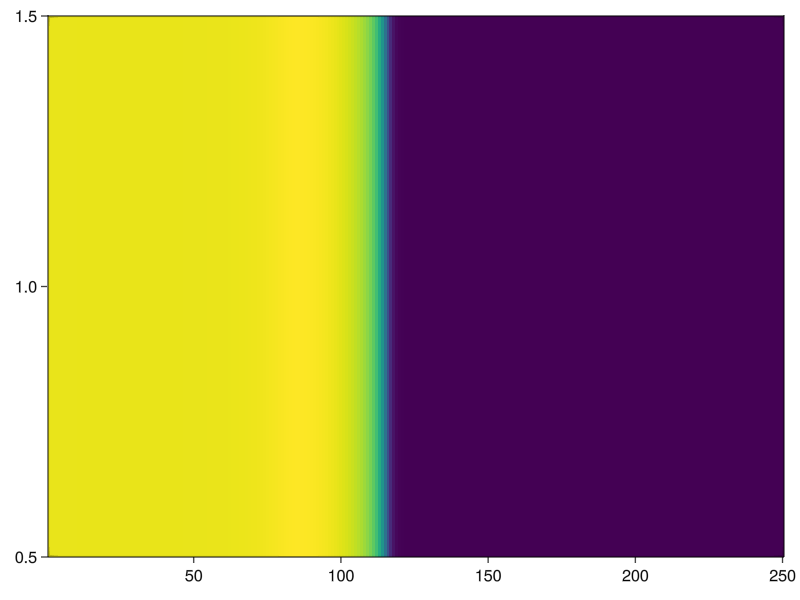

In [73]:
Makie.heatmap(cFArray[end].CDASoA.Values)